# Lấy dữ liệu 

Về chỉ số:

- chỉ số VN30 (30 mã chứng khoán tốt nhất sàn HOSE - Hồ Chí Minh), 
- chỉ số S&P500 (mã 500 công ty vốn hóa tốt nhất của Mỹ), 
- chỉ số lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm

In [1]:
# %pip install yfinance matplotlib seaborn plotly

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_datareader as web
import datetime

In [9]:
vn30_july2024 = [
    "ACB.VN",
    "BID.VN",
    "BVH.VN",
    "BCM.VN",
    "CTG.VN",
    "FPT.VN",
    "GAS.VN",
    "GVR.VN",
    "HDB.VN",
    "HPG.VN",
    "MBB.VN",
    "MSN.VN",
    "MWG.VN",
    "PLX.VN",
    "VIB.VN",
    "POW.VN",
    "SAB.VN",
    "SSI.VN",
    "STB.VN",
    "TCB.VN",
    "TPB.VN",
    "VCB.VN",
    "VHM.VN",
    "VIC.VN",
    "VJC.VN",
    "VNM.VN",
    "VPB.VN",
    "VRE.VN",
    "SHB.VN",
    "SSB.VN",
]

dictionary = {
    "Bank": [
        "ACB.VN",
        "BID.VN",
        "BHV.VN",
        "CTG.VN",
        "HDB.VN",
        "MBB.VN",
        "STB.VN",
        "TCB.VN",
        "TPB.VN",
        "VCB.VN",
        "VPB.VN",
        "SHB.VN",
        "SSB.VN",
    ],
    "Real Estate": ["VIC.VN", "VHM.VN", "VRE.VN"],
    "Energy": ["POW.VN", "GAS.VN"],
    "Consumer Goods": ["MSN.VN", "VNM.VN"],
    "Consumer Services": ["VJC.VN", "MWG.VN"],
    "Technology": ["FPT.VN"],
    "Materials": ["HPG.VN", "PLX.VN"],
    "Beverages": ["SAB.VN"],
    "Securities": ["SSI.VN", "VIB.VN"],
    "Other": ["BCM.VN", "GVR.VN"],
}

# Lấy dữ liệu lãi suất 10 năm của Mỹ từ FRED
vn30 = yf.download(vn30_july2024, period="max")
sp500 = yf.download(["^GSPC"], period="max")
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()
d10y = web.DataReader(["DGS10"], "fred", start, end)

# Chuẩn hóa lại dữ liệu
vn30.index = pd.to_datetime(vn30.index.tz_convert(None))
sp500.index = pd.to_datetime(sp500.index)
d10y.index = pd.to_datetime(d10y.index)

# Print
print("Tải xuống chỉ số VN30 (danh sách các mã cập nhật tại tháng 7/2024)")
print(vn30["Close"]["MBB.VN"].tail())
print("-" * 45)
print("Tải xuống chỉ số S&P 500")
print(sp500["Close"].tail())
print("-" * 45)
print("Tải xuống lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm")
print(d10y["DGS10"].tail())

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  1 of 1 completed


Tải xuống chỉ số VN30 (danh sách các mã cập nhật tại tháng 7/2024)
Date
2024-09-10    23750.0
2024-09-11    23900.0
2024-09-12    24000.0
2024-09-13    23900.0
2024-09-16    23900.0
Name: MBB.VN, dtype: float64
---------------------------------------------
Tải xuống chỉ số S&P 500
Date
2024-09-09    5471.049805
2024-09-10    5495.520020
2024-09-11    5554.129883
2024-09-12    5595.759766
2024-09-13    5626.020020
Name: Close, dtype: float64
---------------------------------------------
Tải xuống lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm
DATE
2024-09-06    3.72
2024-09-09    3.70
2024-09-10    3.65
2024-09-11    3.65
2024-09-12    3.68
Name: DGS10, dtype: float64


In [3]:
# dictionary = {
#     "Bank": [
#         "ACB.VN",
#         "BID.VN",
#         "BHV.VN",
#         "CTG.VN",
#         "HDB.VN",
#         "MBB.VN",
#         "STB.VN",
#         "TCB.VN",
#         "TPB.VN",
#         "VCB.VN",
#         "VPB.VN",
#         "SHB.VN",
#         "SSB.VN",
#     ],
#     "Real Estate": ["VIC.VN", "VHM.VN", "VRE.VN"],
#     "Energy": ["POW.VN", "GAS.VN"],
#     "Consumer Goods": ["MSN.VN", "VNM.VN"],
#     "Consumer Services": ["VJC.VN", "MWG.VN"],
#     "Technology": ["FPT.VN"],
#     "Materials": ["HPG.VN", "PLX.VN"],
#     "Beverages": ["SAB.VN"],
#     "Securities": ["SSI.VN", "VIB.VN"],
#     "Other": ["BCM.VN", "GVR.VN"],
# }

# total = 0
# for key, value in dictionary.items():
#     total += len(value)
#     print(f"{key}: {len(value)}")
# print(total)

# Biểu đồ heatmap đánh giá tương quan của các chỉ số

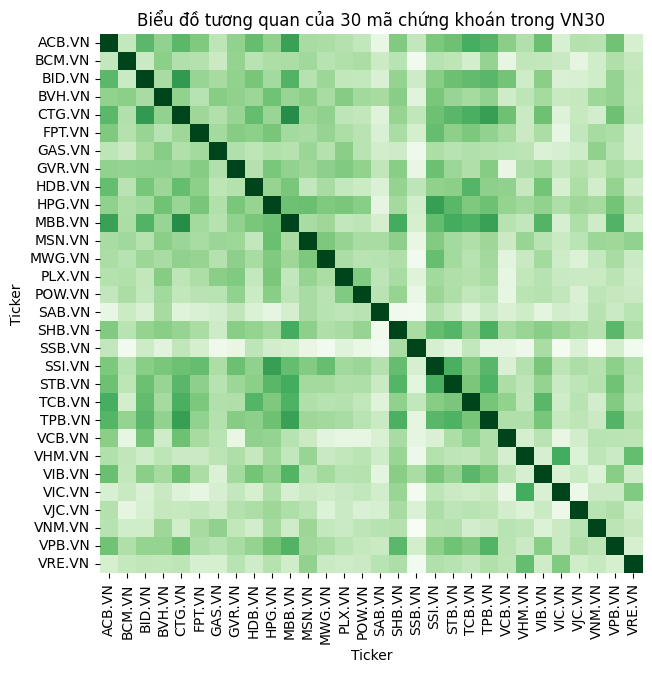

In [29]:
correlation_matrix = vn30["Close"].pct_change(fill_method=None).corr()

plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='Greens', cbar=False)
plt.title('Biểu đồ tương quan của 30 mã chứng khoán trong VN30')
plt.show()

[*********************100%***********************]  30 of 30 completed


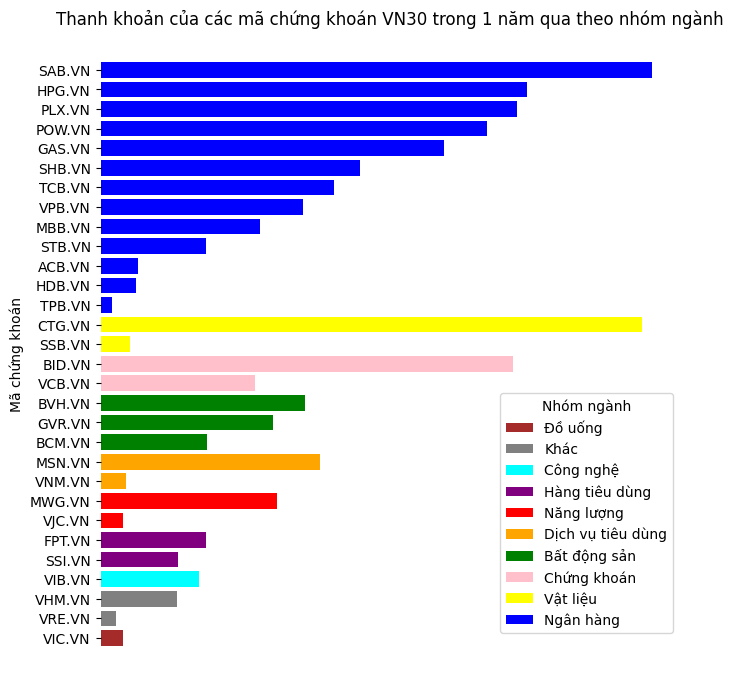

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Giả định dữ liệu của bạn
vn30_july2024 = [
    "ACB.VN",
    "BID.VN",
    "BVH.VN",
    "BCM.VN",
    "CTG.VN",
    "FPT.VN",
    "GAS.VN",
    "GVR.VN",
    "HDB.VN",
    "HPG.VN",
    "MBB.VN",
    "MSN.VN",
    "MWG.VN",
    "PLX.VN",
    "VIB.VN",
    "POW.VN",
    "SAB.VN",
    "SSI.VN",
    "STB.VN",
    "TCB.VN",
    "TPB.VN",
    "VCB.VN",
    "VHM.VN",
    "VIC.VN",
    "VJC.VN",
    "VNM.VN",
    "VPB.VN",
    "VRE.VN",
    "SHB.VN",
    "SSB.VN",
]

dictionary = {
    "Ngân hàng": [
        "ACB.VN",
        "BID.VN",
        "BVH.VN",
        "CTG.VN",
        "HDB.VN",
        "MBB.VN",
        "STB.VN",
        "TCB.VN",
        "TPB.VN",
        "VCB.VN",
        "VPB.VN",
        "SHB.VN",
        "SSB.VN",
    ],
    "Bất động sản": ["VIC.VN", "VHM.VN", "VRE.VN"],
    "Năng lượng": ["POW.VN", "GAS.VN"],
    "Hàng tiêu dùng": ["MSN.VN", "VNM.VN"],
    "Dịch vụ tiêu dùng": ["VJC.VN", "MWG.VN"],
    "Công nghệ": ["FPT.VN"],
    "Vật liệu": ["HPG.VN", "PLX.VN"],
    "Đồ uống": ["SAB.VN"],
    "Chứng khoán": ["SSI.VN", "VIB.VN"],
    "Khác": ["BCM.VN", "GVR.VN"],
}

# Giả định dữ liệu tổng thanh khoản (Volume) lấy từ vn30
vn30 = yf.download(vn30_july2024, period="1y")

# Tính tổng thanh khoản
total_volume = vn30["Volume"].sum()

# Tạo danh sách dữ liệu với tổng thanh khoản cho mỗi mã cổ phiếu theo nhóm ngành
data = []
for sector, stocks in dictionary.items():
    sector_volume = 0
    for stock in stocks:
        if stock in total_volume.index:
            stock_volume = total_volume[stock]
            sector_volume += stock_volume
            data.append(
                {"Sector": sector, "Stock": stock, "Total Volume": stock_volume}
            )
    # Thêm tổng thanh khoản cho từng nhóm ngành để sắp xếp ngành
    data.append(
        {
            "Sector": sector,
            "Stock": "Total",  # Đánh dấu tổng của nhóm ngành
            "Total Volume": sector_volume,
        }
    )

# Chuyển đổi sang DataFrame
df_volume = pd.DataFrame(data)

# Loại bỏ hàng chứa 'Total' để giữ chỉ các cổ phiếu
df_volume_stocks = df_volume[df_volume["Stock"] != "Total"]

# Sắp xếp các mã cổ phiếu trong mỗi nhóm ngành theo tổng thanh khoản tang dần
df_volume_stocks = df_volume_stocks.sort_values(
    by=["Sector", "Total Volume"], ascending=[True, True]
)

# Tính tổng thanh khoản cho từng nhóm ngành và sắp xếp nhóm ngành theo thứ tự tang dần
df_total_sector = df_volume[df_volume["Stock"] == "Total"].sort_values(
    by="Total Volume", ascending=True
)

# Vẽ biểu đồ ngang
plt.figure(figsize=(7, 7))

# Đặt màu cho mỗi nhóm ngành
colors = {
    "Ngân hàng": "blue",
    "Bất động sản": "green",
    "Năng lượng": "red",
    "Hàng tiêu dùng": "purple",
    "Dịch vụ tiêu dùng": "orange",
    "Công nghệ": "cyan",
    "Vật liệu": "yellow",
    "Đồ uống": "brown",
    "Chứng khoán": "pink",
    "Khác": "gray",
}

# Duyệt qua các nhóm ngành đã sắp xếp và vẽ biểu đồ
position = 0
for _, row in df_total_sector.iterrows():
    sector = row["Sector"]
    sector_data = df_volume_stocks[df_volume_stocks["Sector"] == sector]

    # Vẽ các mã cổ phiếu trong nhóm ngành theo chiều ngang
    plt.barh(
        [position + i for i in range(len(sector_data))],
        sector_data["Total Volume"],
        label=sector,
        color=colors[sector],
    )

    # Cập nhật vị trí cho nhóm ngành tiếp theo
    position += len(sector_data)

# Thêm thông tin biểu đồ
plt.title("Thanh khoản của các mã chứng khoán VN30 trong 1 năm qua theo nhóm ngành")
plt.ylabel("Mã chứng khoán")

# Hiển thị tên mã chứng khoán trên trục y (nằm ngang)
stock_labels = df_volume_stocks["Stock"].tolist()
plt.yticks([i for i in range(len(stock_labels))], stock_labels)

# Di chuyển hộp chú thích lên góc phải trên cùng
plt.legend(title="Nhóm ngành", bbox_to_anchor=(1, 0.45), loc="upper right")

# Ẩn trục hoành
plt.gca().axes.get_xaxis().set_visible(False)

# Loại bỏ viền ngoài
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

[*********************100%***********************]  30 of 30 completed


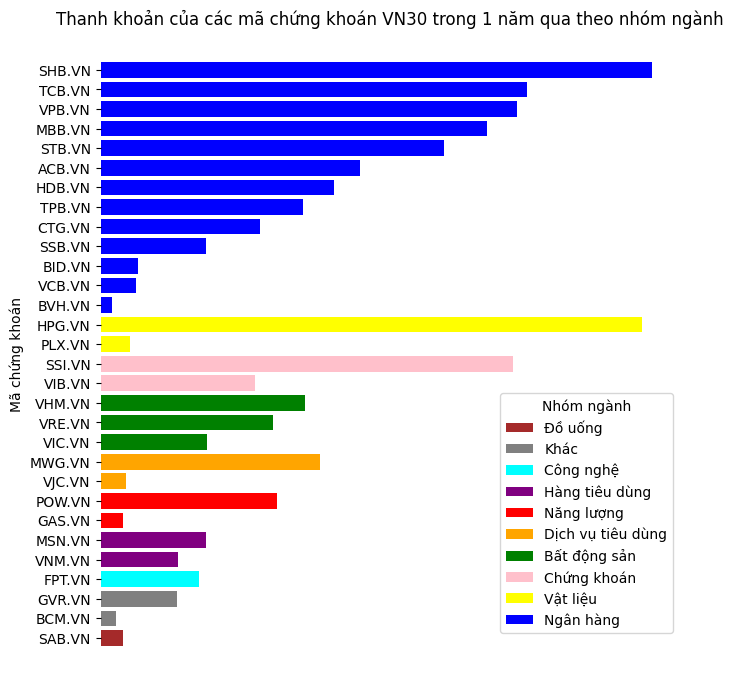

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Giả định dữ liệu của bạn
vn30_july2024 = [
    "ACB.VN",
    "BID.VN",
    "BVH.VN",
    "BCM.VN",
    "CTG.VN",
    "FPT.VN",
    "GAS.VN",
    "GVR.VN",
    "HDB.VN",
    "HPG.VN",
    "MBB.VN",
    "MSN.VN",
    "MWG.VN",
    "PLX.VN",
    "VIB.VN",
    "POW.VN",
    "SAB.VN",
    "SSI.VN",
    "STB.VN",
    "TCB.VN",
    "TPB.VN",
    "VCB.VN",
    "VHM.VN",
    "VIC.VN",
    "VJC.VN",
    "VNM.VN",
    "VPB.VN",
    "VRE.VN",
    "SHB.VN",
    "SSB.VN",
]

dictionary = {
    "Ngân hàng": [
        "ACB.VN",
        "BID.VN",
        "BVH.VN",
        "CTG.VN",
        "HDB.VN",
        "MBB.VN",
        "STB.VN",
        "TCB.VN",
        "TPB.VN",
        "VCB.VN",
        "VPB.VN",
        "SHB.VN",
        "SSB.VN",
    ],
    "Bất động sản": ["VIC.VN", "VHM.VN", "VRE.VN"],
    "Năng lượng": ["POW.VN", "GAS.VN"],
    "Hàng tiêu dùng": ["MSN.VN", "VNM.VN"],
    "Dịch vụ tiêu dùng": ["VJC.VN", "MWG.VN"],
    "Công nghệ": ["FPT.VN"],
    "Vật liệu": ["HPG.VN", "PLX.VN"],
    "Đồ uống": ["SAB.VN"],
    "Chứng khoán": ["SSI.VN", "VIB.VN"],
    "Khác": ["BCM.VN", "GVR.VN"],
}

# Giả định dữ liệu tổng thanh khoản (Volume) lấy từ vn30
vn30 = yf.download(vn30_july2024, period="1y")

# Tính tổng thanh khoản trong 1 năm qua
total_volume = vn30["Volume"].sum()

# Tạo danh sách dữ liệu với tổng thanh khoản cho mỗi mã cổ phiếu theo nhóm ngành
data = []
for sector, stocks in dictionary.items():
    sector_volume = 0
    for stock in stocks:
        if stock in total_volume.index:
            stock_volume = total_volume[stock]
            sector_volume += stock_volume
            data.append(
                {"Sector": sector, "Stock": stock, "Total Volume": stock_volume}
            )
    # Thêm tổng thanh khoản cho từng nhóm ngành để sắp xếp ngành
    data.append(
        {
            "Sector": sector,
            "Stock": "Total",  # Đánh dấu tổng của nhóm ngành
            "Total Volume": sector_volume,
        }
    )

# Chuyển đổi sang DataFrame
df_volume = pd.DataFrame(data)

# Loại bỏ hàng chứa 'Total' để giữ chỉ các cổ phiếu
df_volume_stocks = df_volume[df_volume["Stock"] != "Total"]

# Sắp xếp các mã cổ phiếu trong mỗi nhóm ngành theo tổng thanh khoản tăng dần
df_volume_stocks = df_volume_stocks.sort_values(
    by=["Sector", "Total Volume"], ascending=[True, True]
)

# Tính tổng thanh khoản cho từng nhóm ngành và sắp xếp nhóm ngành theo thứ tự tăng dần
df_total_sector = df_volume[df_volume["Stock"] == "Total"].sort_values(
    by="Total Volume", ascending=True
)

# Vẽ biểu đồ ngang
plt.figure(figsize=(7, 7))

# Đặt màu cho mỗi nhóm ngành
colors = {
    "Ngân hàng": "blue",
    "Bất động sản": "green",
    "Năng lượng": "red",
    "Hàng tiêu dùng": "purple",
    "Dịch vụ tiêu dùng": "orange",
    "Công nghệ": "cyan",
    "Vật liệu": "yellow",
    "Đồ uống": "brown",
    "Chứng khoán": "pink",
    "Khác": "gray",
}

# Duyệt qua các nhóm ngành đã sắp xếp và vẽ biểu đồ
position = 0
y_labels = []  # Danh sách để lưu trữ thứ tự mã cổ phiếu
for _, row in df_total_sector.iterrows():
    sector = row["Sector"]
    sector_data = df_volume_stocks[df_volume_stocks["Sector"] == sector]

    # Vẽ các mã cổ phiếu trong nhóm ngành theo chiều ngang
    plt.barh(
        [position + i for i in range(len(sector_data))],
        sector_data["Total Volume"],
        label=sector,
        color=colors[sector],
    )

    # Thêm mã cổ phiếu vào danh sách y_labels
    y_labels.extend(sector_data["Stock"].tolist())

    # Cập nhật vị trí cho nhóm ngành tiếp theo
    position += len(sector_data)

# Thêm thông tin biểu đồ
plt.title("Thanh khoản của các mã chứng khoán VN30 trong 1 năm qua theo nhóm ngành")
plt.ylabel("Mã chứng khoán")

# Thiết lập nhãn mã cổ phiếu theo đúng thứ tự xuất hiện
plt.yticks([i for i in range(len(y_labels))], y_labels)

# Di chuyển hộp chú thích lên góc phải trên cùng
plt.legend(title="Nhóm ngành", bbox_to_anchor=(1, 0.45), loc="upper right")

# Ẩn trục hoành
plt.gca().axes.get_xaxis().set_visible(False)

# Loại bỏ viền ngoài
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Nhận xét thấy 30 mã có 1 số mã có quan hệ tương quan khá cao với nhau. Điều này đến từ việc chung nhóm ngành kinh doanh trong 30 mã này điển hình như ngân hàng, xây dựng, ...

Sau đây em sẽ phân tích ảnh hưởng của chỉ số S&P 500 và lãi suất trái phiếu chính phủ Mỹ 10 năm đến chứng khoán Việt Nam qua chỉ số VN30.

Dữ liệu lọc sạch tổng hợp là: 
                VN30_Sum       S&P500  10Y_Treasury_Yield
2024-09-06  1.358901e+06  5408.419922                3.72
2024-09-09  1.349789e+06  5471.049805                3.70
2024-09-10  1.340051e+06  5495.520020                3.65
2024-09-11  1.338661e+06  5554.129883                3.65
2024-09-12  1.341411e+06  5595.759766                3.68
Ma trận tương quan: 
                    VN30_Sum    S&P500  10Y_Treasury_Yield
VN30_Sum            1.000000  0.887844            0.179945
S&P500              0.887844  1.000000           -0.048728
10Y_Treasury_Yield  0.179945 -0.048728            1.000000


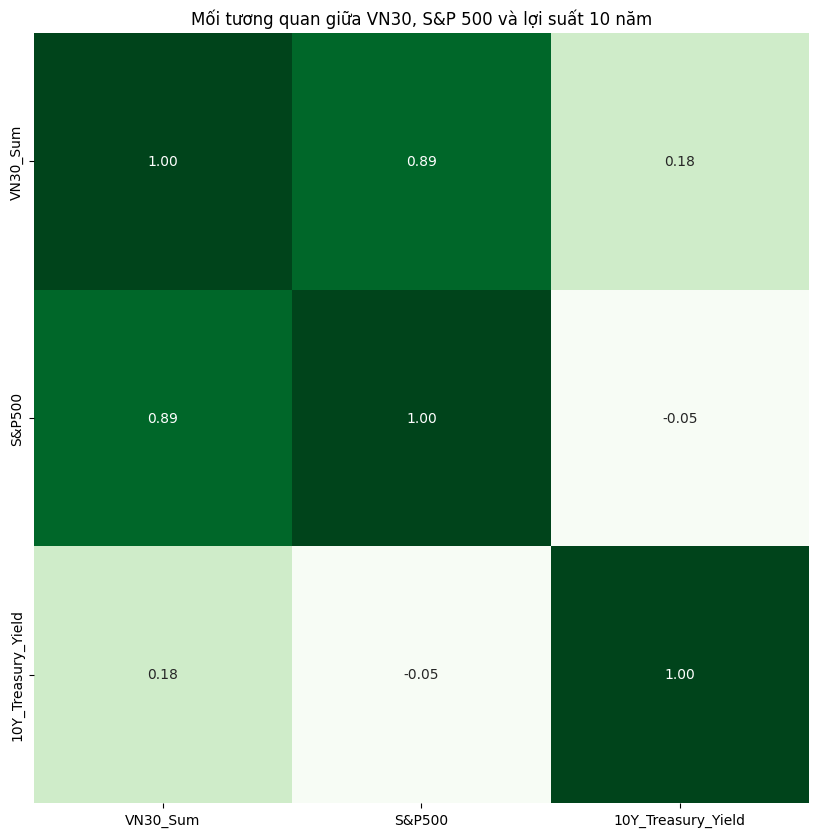

In [25]:
# Tạo dataframe hợp nhất
merged_data = pd.concat(
    [vn30["Close"].sum(axis=1), sp500["Close"], d10y["DGS10"]], axis=1, join="inner"
)

# Đổi tên cột
merged_data.columns = ["VN30_Sum", "S&P500", "10Y_Treasury_Yield"]

# Xem thử dữ liệu
print(f"Dữ liệu lọc sạch tổng hợp là: \n{merged_data.tail()}")

# Tính ma trận tương quan
correlation_matrix = merged_data.corr()
print(f"Ma trận tương quan: \n{correlation_matrix}")

# Vẽ heatmap với colorbar bị ẩn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", cbar=False)
plt.title("Mối tương quan giữa VN30, S&P 500 và lợi suất 10 năm")
plt.show()

Như vậy S&P500 dễ ảnh hưởng tới VN30 hơn.

# Một số góc nhìn hay ho khác về VN30

Diễn giải về lý do tăng trưởng của thanh khoản, công ty tiềm năng tăng trưởng dài hạn, ổn định, ... sẽ là các thông tin có giá trị phân tích về sau này.

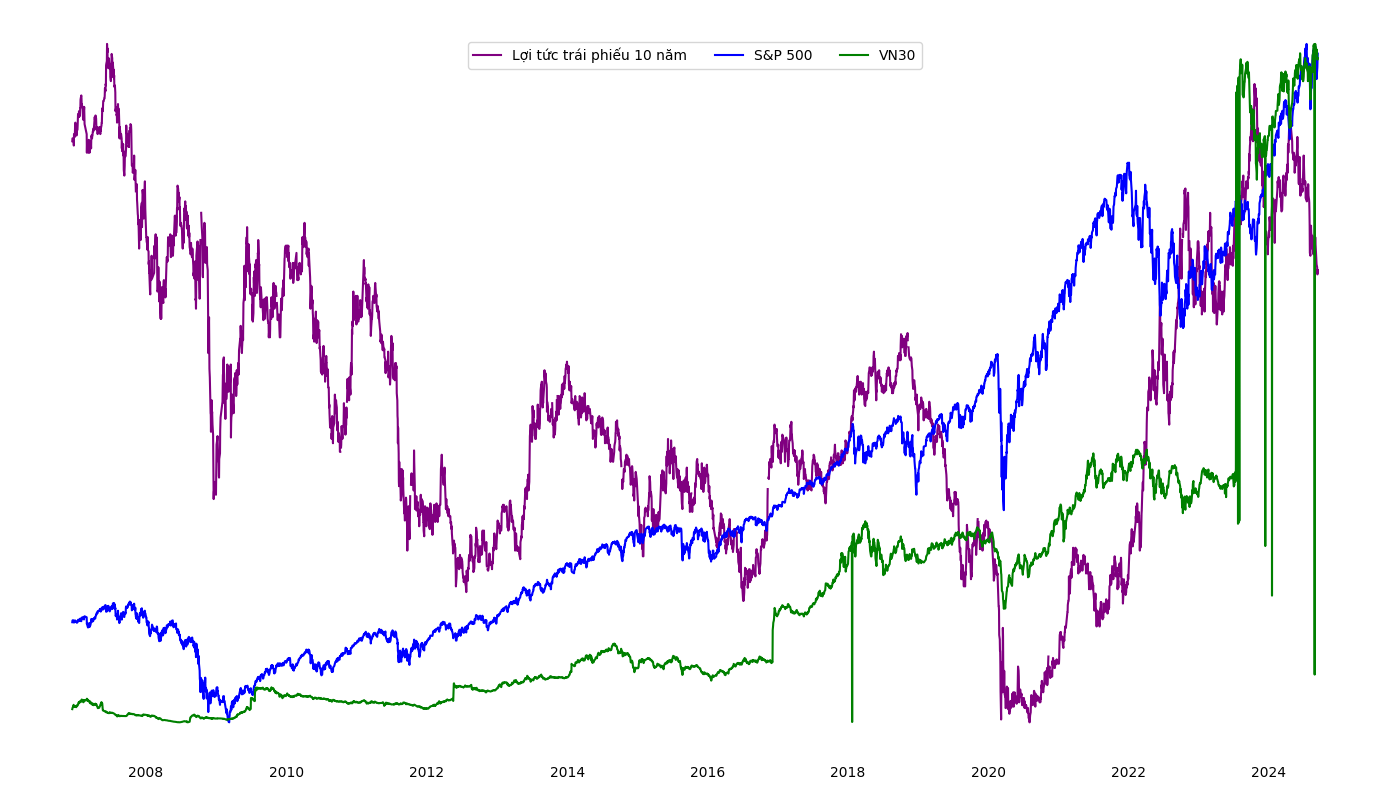

In [23]:
import matplotlib.pyplot as plt

# Tạo một figure và các trục cho ba hệ quy chiếu y khác nhau
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ đường Lợi tức trái phiếu kho bạc 10 năm
ax1.plot(
    merged_data.index,
    merged_data["10Y_Treasury_Yield"],
    color="purple",
    label="Lợi tức trái phiếu 10 năm",
)

# Vẽ đường S&P 500
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data["S&P500"], color="blue", label="S&P 500")

# Vẽ đường VN30 (Tổng cộng 30 cổ phiếu)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
ax3.plot(merged_data.index, merged_data["VN30_Sum"], color="green", label="VN30")

# Bỏ viền (spines) của tất cả các trục
for ax in [ax1, ax2, ax3]:
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(left=False, right=False, bottom=False)
    ax.set_yticklabels([])

# Ẩn trục x
# ax1.set_xticks([])

# Tạo hộp chú thích ở chính giữa phía trên của biểu đồ
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2, ax3]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=3)

# Thêm trục thời gian ở dưới cùng
ax1.set_xlabel("")

# Tối ưu hóa bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


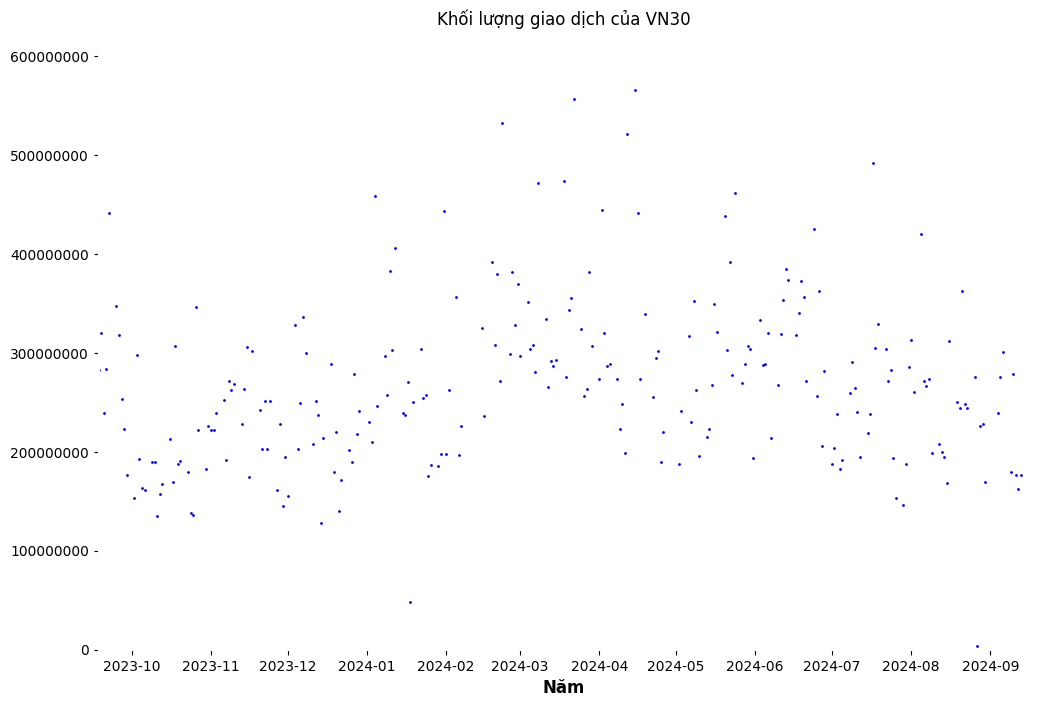

In [69]:
total_volume = vn30['Volume'].sum(axis=1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.figure(figsize=(12, 8))
plt.scatter(total_volume.index, total_volume, color='blue', s=1, marker='o')
plt.title('Khối lượng giao dịch của VN30')
# plt.ylabel('Khối lượng giao dịch')
plt.xlabel('Năm')
plt.grid(False)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(total_volume.index.min(), total_volume.index.max())
plt.ylim(0, total_volume.max() * 1.1)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# plt.legend(['Khối lượng giao dịch'])
plt.show()

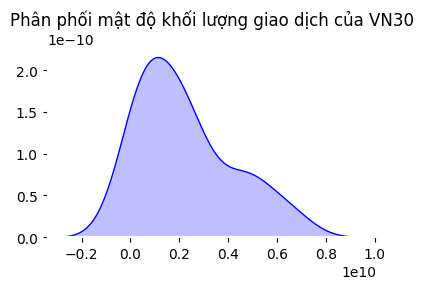

In [65]:
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.kdeplot(total_volume.values, color='blue', fill=True)
plt.grid(False)
plt.title('Phân phối mật độ khối lượng giao dịch của VN30')
plt.xlabel('') #Khối lượng giao dịch')
plt.ylabel('') #'Mật độ')
plt.tight_layout()
plt.show()


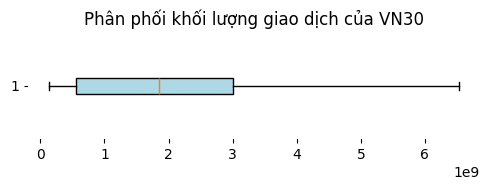

In [66]:
plt.figure(figsize=(5, 2))
plt.boxplot(total_volume.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.grid(False)
plt.title('Phân phối khối lượng giao dịch của VN30')
# plt.xlabel('Khối lượng giao dịch')
plt.tight_layout()
plt.show()

In [8]:
%pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Danh sách các mã VN30
vn30_july2024 = [
    "ACB.VN",
    "BID.VN",
    "BVH.VN",
    "BCM.VN",
    "CTG.VN",
    "FPT.VN",
    "GAS.VN",
    "GVR.VN",
    "HDB.VN",
    "HPG.VN",
    "MBB.VN",
    "MSN.VN",
    "MWG.VN",
    "PLX.VN",
    "VIB.VN",
    "POW.VN",
    "SAB.VN",
    "SSI.VN",
    "STB.VN",
    "TCB.VN",
    "TPB.VN",
    "VCB.VN",
    "VHM.VN",
    "VIC.VN",
    "VJC.VN",
    "VNM.VN",
    "VPB.VN",
    "VRE.VN",
    "SHB.VN",
    "SSB.VN",
]

# Lấy dữ liệu từ yfinance cho tất cả các mã VN30
vn30_data = yf.download(vn30_july2024, period="max")
vn30_data.index = pd.to_datetime(vn30_data.index.tz_convert(None))

# Chuyển đổi thành DataFrame cho mã cụ thể (ví dụ MBB.VN)
MBB_data = vn30_data.loc[:, pd.IndexSlice[:, "MBB.VN"]]
MBB_data.columns = MBB_data.columns.droplevel(1)  # Loại bỏ MultiIndex để đơn giản hóa
MBB_data = MBB_data.dropna()  # Loại bỏ các hàng có giá trị NaN

# Chuyển đổi chỉ số thời gian thành datetime (nếu cần)
MBB_data.index = pd.to_datetime(MBB_data.index)

# Xem trước dữ liệu
print(MBB_data.head())


[*********************100%***********************]  30 of 30 completed

Price          Adj Close    Close     High      Low     Open      Volume
Date                                                                    
2023-07-17  18199.138672  18600.0  18850.0  18500.0  18750.0  11006300.0
2023-07-19  18003.447266  18400.0  18700.0  18400.0  18600.0  11946400.0
2023-07-20  18052.371094  18450.0  18500.0  18300.0  18400.0   6450615.0
2023-07-21  18248.060547  18650.0  18650.0  18400.0  18550.0   8585758.0
2023-07-24  18345.904297  18750.0  18750.0  18550.0  18650.0   8945994.0


In [58]:
import pandas as pd

# Kiểm tra kiểu của chỉ mục
print(type(MBB_data.index))

# Nếu không phải là DatetimeIndex, chuyển đổi nó
if not isinstance(MBB_data.index, pd.DatetimeIndex):
    MBB_data.index = pd.to_datetime(MBB_data.index)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


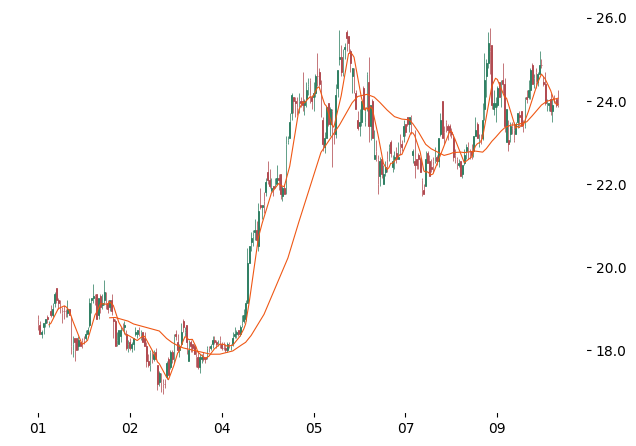

In [60]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Vẽ biểu đồ nến với các tùy chỉnh
fig, ax = mpf.plot(
    MBB_data, type="candle", style="charles", mav=(7, 40), ylabel="", returnfig=True
)

# Tùy chỉnh lưới và trục
ax[0].grid(False)  # Ẩn lưới


def format_y(value, tick_number):
    return f"{value / 1000}"


ax[0].yaxis.set_major_formatter(plt.FuncFormatter(format_y))

ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m'))

# Đặt nhãn trục x nằm ngang và xoay 45 độ
for label in ax[0].get_xticklabels():
    label.set_rotation(0)

# Hiển thị biểu đồ
plt.show()

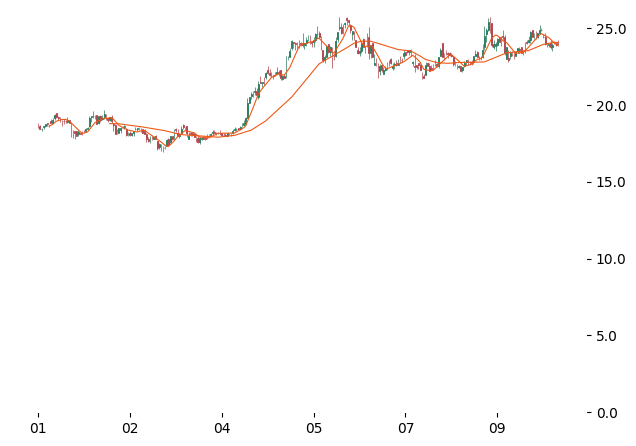

In [61]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Vẽ biểu đồ nến với các tùy chỉnh
fig, ax = mpf.plot(
    MBB_data, type="candle", style="charles", mav=(7, 40), ylabel="", returnfig=True
)

# Tùy chỉnh lưới và trục
ax[0].grid(False)  # Ẩn lưới


# Điều chỉnh hiển thị nhãn trục y chỉ với 2 chữ số đầu tiên (giới hạn số thập phân)
def format_y(value, tick_number):
    return f"{value / 1000}"


ax[0].yaxis.set_major_formatter(plt.FuncFormatter(format_y))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
# Đặt giới hạn trục y để bắt đầu từ 0
ax[0].set_ylim(bottom=0)

# Đặt nhãn trục x nằm ngang
for label in ax[0].get_xticklabels():
    label.set_rotation(0)

# Hiển thị biểu đồ
plt.show()

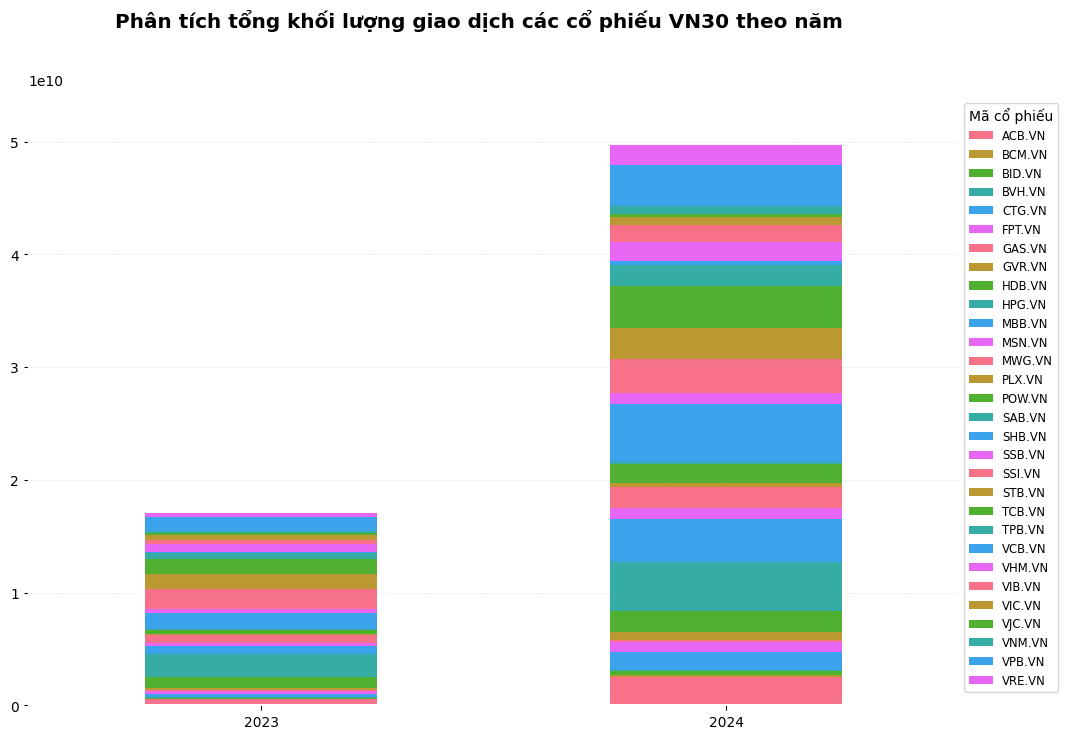

In [79]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến Volume
volume_columns = [col for col in df.columns if col[0] == "Volume"]

# Tạo dataframe chỉ chứa các cột Volume
volume_df = df[volume_columns].copy()
volume_df.columns = volume_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
volume_df["Year"] = volume_df.index.year

# Nhóm dữ liệu theo năm và tính tổng khối lượng
pivot_df = volume_df.groupby("Year").sum()

# Vẽ biểu đồ khối lượng của các cổ phiếu theo năm
sns.set_palette("husl")
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 8))
# plt.title("Khối lượng giao dịch của các cổ phiếu theo năm") 
plt.xlabel("")  
# plt.ylabel("Khối lượng")
plt.grid(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, pivot_df.sum(axis=1).max() * 1.1)
plt.xticks(rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='plain', axis='y')
plt.legend(title="Mã cổ phiếu", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.suptitle("Phân tích tổng khối lượng giao dịch các cổ phiếu VN30 theo năm")
plt.show()

<Figure size 1200x1000 with 0 Axes>

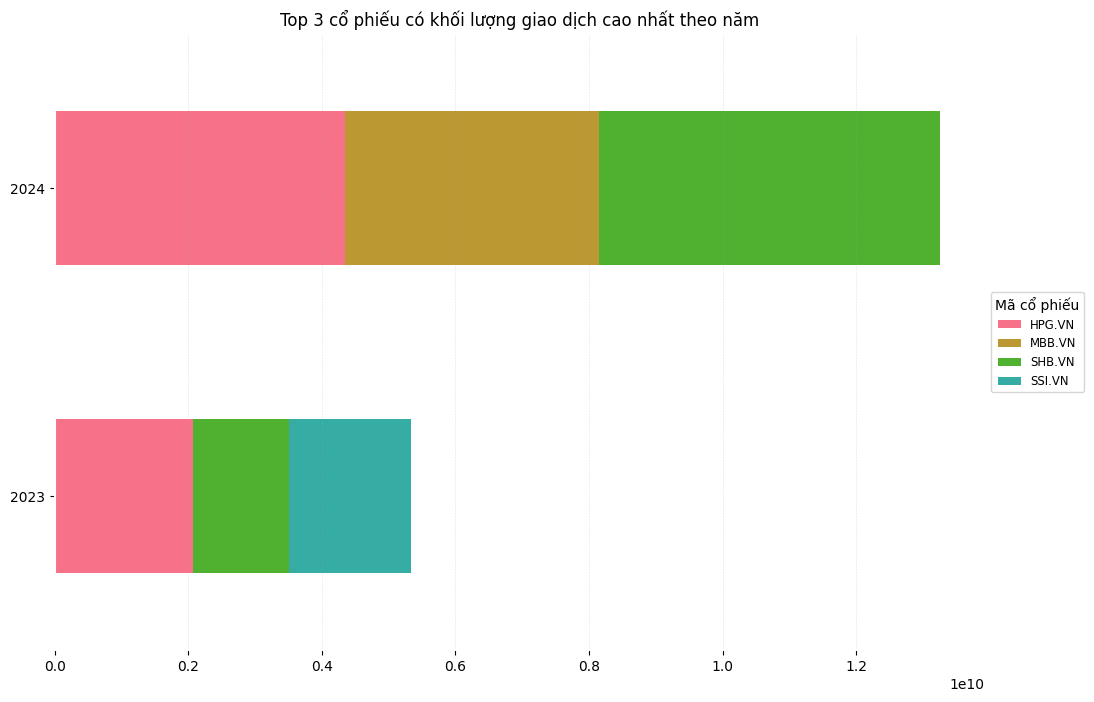

In [80]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến Volume
volume_columns = [col for col in df.columns if col[0] == "Volume"]

# Tạo dataframe chỉ chứa các cột Volume
volume_df = df[volume_columns].copy()
volume_df.columns = volume_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
volume_df["Year"] = volume_df.index.year

# Nhóm dữ liệu theo năm và tính tổng khối lượng cho từng mã chứng khoán
annual_volume_df = volume_df.groupby(["Year"]).sum()


# Hàm để lấy top 3 cổ phiếu theo khối lượng giao dịch cho từng năm
def get_top_3_stocks(year_df):
    # Sắp xếp các cổ phiếu theo khối lượng giao dịch giảm dần
    sorted_df = year_df.sort_values(ascending=False)
    # Lấy 3 cổ phiếu có khối lượng giao dịch cao nhất
    return sorted_df.head(3)


# Tạo một dataframe cho top 3 cổ phiếu theo năm
top_3_df = annual_volume_df.apply(lambda x: get_top_3_stocks(x), axis=1)

# Chuyển đổi top_3_df thành dạng dataframe với các cột rõ ràng
top_3_df = top_3_df.reset_index()
top_3_df = top_3_df.melt(id_vars="Year", var_name="Ticker", value_name="Volume")

# Đặt lại tên các cột cho dữ liệu
top_3_df.columns = ["Year", "Ticker", "Volume"]

# Sắp xếp dữ liệu theo năm và khối lượng giảm dần
top_3_df = top_3_df.sort_values(by=["Year", "Volume"], ascending=[True, False])

# Pivot dữ liệu để vẽ biểu đồ
pivot_df = top_3_df.pivot_table(
    index="Year", columns="Ticker", values="Volume", aggfunc="sum", fill_value=0
)

# Vẽ biểu đồ cột chồng nằm ngang
plt.figure(figsize=(12, 10))
pivot_df.plot(kind="barh", stacked=True, figsize=(12, 8))
plt.title("Top 3 cổ phiếu có khối lượng giao dịch cao nhất theo năm")
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.legend(
    title="Mã cổ phiếu", loc="center left", bbox_to_anchor=(1, 0.5), fontsize="small"
)
plt.show()

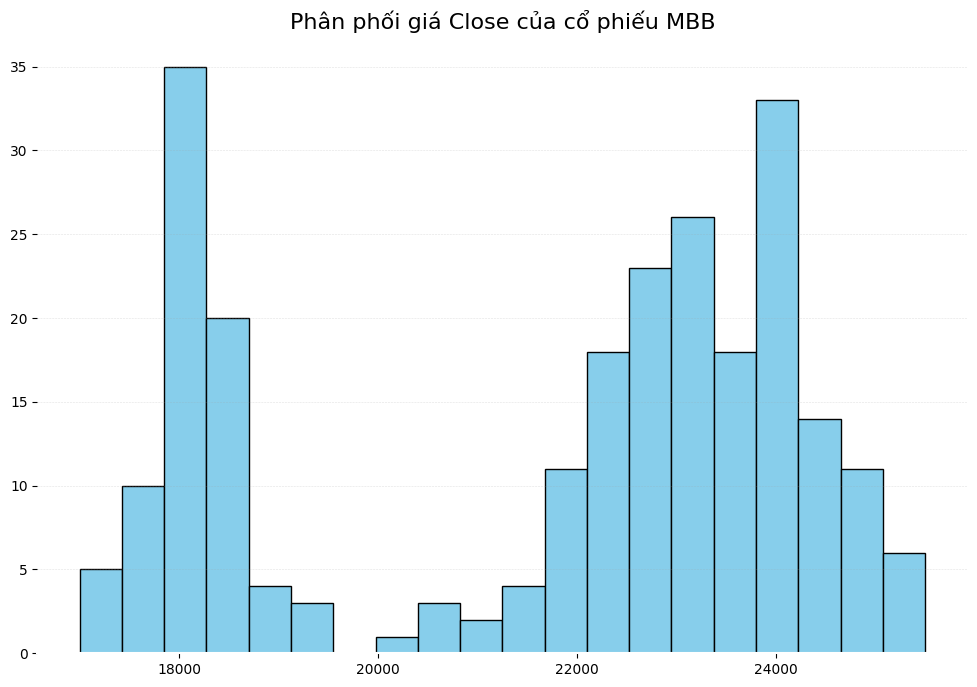

In [81]:
mbb_data = vn30["Close"]["MBB.VN"]

plt.figure(figsize=(12, 8))
plt.hist(mbb_data, bins=20, color="skyblue", edgecolor="black")
plt.title("Phân phối giá Close của cổ phiếu MBB", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("", fontsize=14)
plt.grid(False)
plt.grid(axis="y", linestyle="--", alpha=0.3)

# an boder
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.ticklabel_format(style="plain", axis="y")  # Định dạng số đơn giản
plt.show()

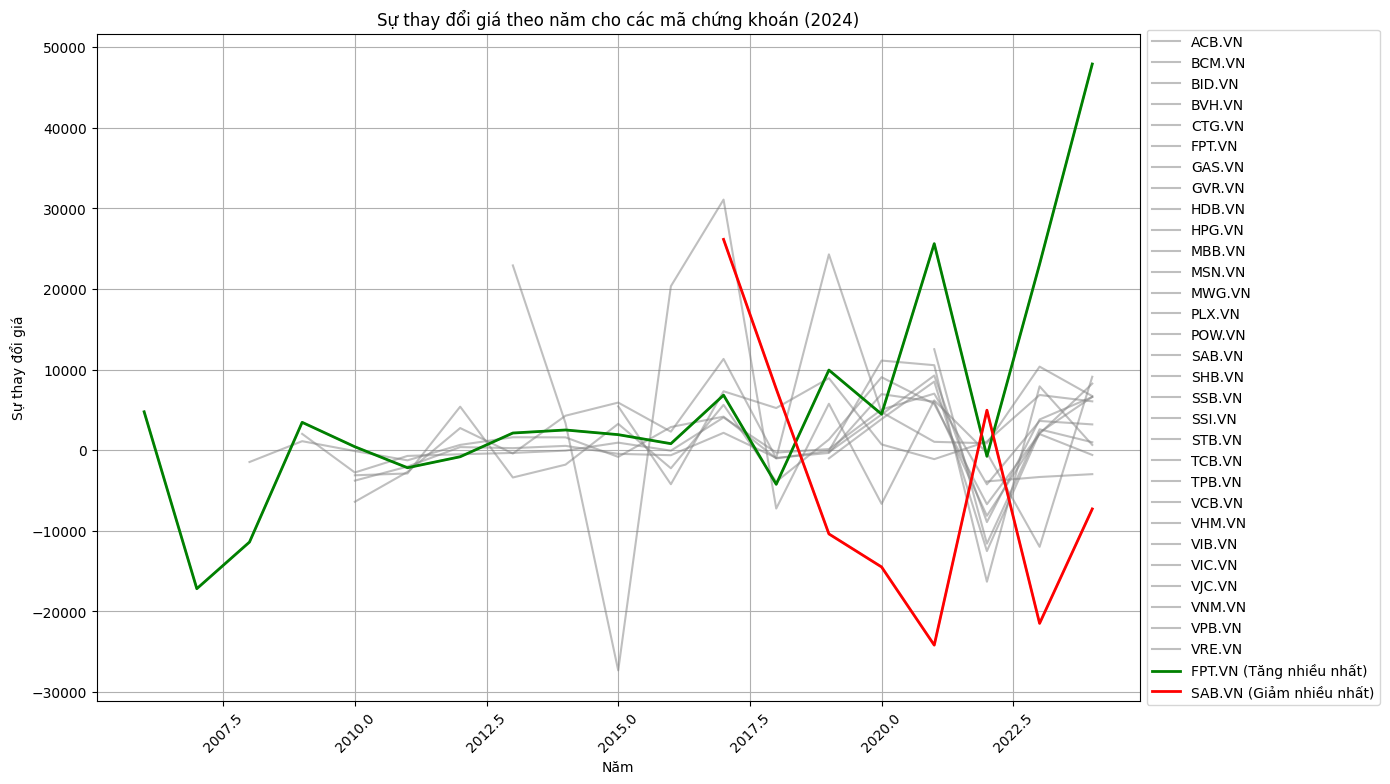

In [12]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến giá (Giả sử có cột 'Close')
price_columns = [col for col in df.columns if col[0] == "Close"]

# Tạo dataframe chỉ chứa các cột Giá
price_df = df[price_columns].copy()
price_df.columns = price_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
price_df["Year"] = price_df.index.year

# Tính sự thay đổi giá theo năm cho từng mã cổ phiếu
annual_change_df = price_df.groupby("Year").apply(lambda x: x.iloc[-1] - x.iloc[0], include_groups=False)

# Tìm mã cổ phiếu có sự thay đổi giá nhiều nhất và ít nhất trong năm gần nhất
latest_year = price_df["Year"].max()
latest_changes = annual_change_df.loc[latest_year]
top_increase = latest_changes.idxmax()
top_decrease = latest_changes.idxmin()

# Vẽ biểu đồ sự thay đổi giá cho năm gần nhất
plt.figure(figsize=(14, 8))
for ticker in annual_change_df.columns:
    plt.plot(
        annual_change_df.index,
        annual_change_df[ticker],
        label=ticker,
        color="grey",
        alpha=0.5,
    )

# Highlight the stocks with the highest increase and decrease
plt.plot(
    annual_change_df.index,
    annual_change_df[top_increase],
    label=f"{top_increase} (Tăng nhiều nhất)",
    color="green",
    linewidth=2,
)
plt.plot(
    annual_change_df.index,
    annual_change_df[top_decrease],
    label=f"{top_decrease} (Giảm nhiều nhất)",
    color="red",
    linewidth=2,
)

plt.title(f"Sự thay đổi giá theo năm cho các mã chứng khoán ({latest_year})")
plt.xlabel("Năm")
plt.ylabel("Sự thay đổi giá")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()